In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

In [4]:
bias = 100


In [5]:
X , y , coef = make_regression(n_features =1 , bias = bias , coef = True , noise  =10 , random_state = 42)

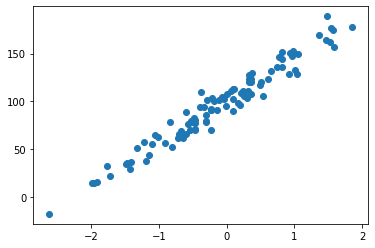

In [6]:
plt.scatter(X, y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()


In [9]:
model.fit(X ,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([44.43716999])

In [11]:
model.intercept_

101.16511532052698

In [12]:
class CustomLinearRegression:
    def __init__ (self , lr = 0.1):
        self.__lr = lr
    def fit(self , X ,y):
        self.__X = X 
        self.__y = y
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        errors = []
        for k in range(20):
            self.gradient_decent()
            errors.append(self.error())
        return errors
    
    def gradient_decent(self):
        delta_coef , delta_bias = self.gradient()
        self.coef_ +=delta_coef
        self.intercept_ +=delta_bias
      ##  print(self.coef_ , self.intercept_)
    def gradient(self):
        yh = self.hypo(self.__X)
        diff = (yh  - self.__y.reshape(-1,1))
        del_err_coef = (((2*diff) * self.__X).mean() )
        del_err_inter = ((2*diff).mean())
        return - del_err_coef*self.__lr , -del_err_inter*self.__lr
    def hypo(self , X):
        return (X* self.coef_ + self.intercept_)
   
    def error(self):
        yh = self.hypo(self.__X)
        diff = (yh  - self.__y.reshape(-1,1))
        return ((diff**2).mean())

In [13]:
model = CustomLinearRegression()

In [14]:
error = model.fit(X,y)

In [15]:
model.coef_ , model.intercept_

(42.19419964207186, 99.38834395094898)

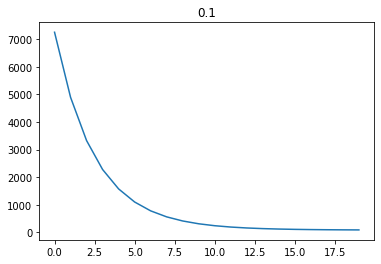

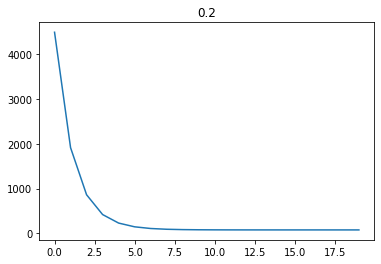

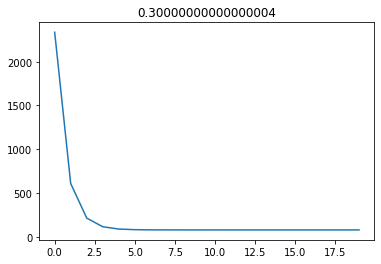

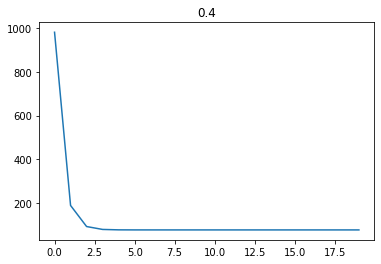

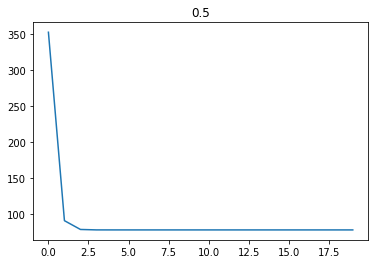

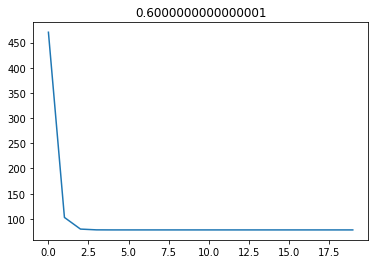

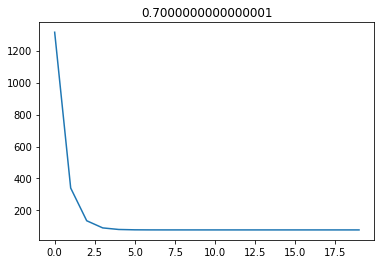

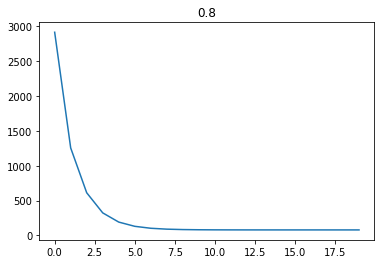

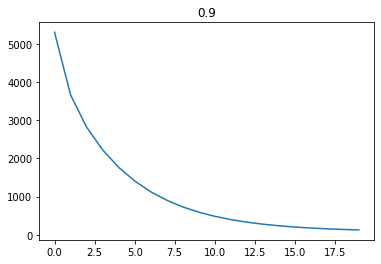

In [16]:

for i in range(1, 10):
    model = CustomLinearRegression(lr=.1 * i)
    errs = model.fit(X, y)

    plt.figure()
    plt.title(str(.1 * i))
    plt.plot(errs)